YS - copy of the top Kernel on Kaggle for this competition. It is pretty recent (end of 2018). Competition is 2 years old

**Facial Keypoint Detection**          
 First of all let's discuss what we are given.        
We are given three CSV files.        
training.csv :- Its has coordinates of facial keypoints like left eye, rigth eye etc and also the image.      
test.csv :- Its has image only and we have to give coordinates of various facial keypoints by looking at third csv file which is IdLookupTable.csv     
Rest everything is explained below.      
**I would really appreciate if you could upvote this kernel.**


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [39]:
!ls /content/drive

'My Drive'


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [40]:
!ls '/content/drive/My Drive/Colab Notebooks'

 00_notebook_tutorial_YS.ipynb
'Copy of 00_notebook_tutorial.ipynb'
'Copy of first_steps_with_tensor_flow.ipynb'
'Copy of GDG-NYC Flowers Project - Using Transfer Learning InceptionV3- presentation-Yuri.ipynb'
'Copy of lesson3-head-pose-Yuri-Drive.ipynb'
'Copy of TensorFlow with GPU'
"Copy of TensorFlow with GPU  - Yuri's version"
 download_images_YS.ipynb
 face
 facial-keypoint-detection.ipynb
 From-lesson3-head-pose-Yuri-Drive.ipynb
'GDG-NYC Flowers Project - Using Transfer Learning InceptionV3- presentation-Yuri.ipynb'
'GDG-NYC Flowers Project - Using Transfer Learning InceptionV3- presentation-Yuri-try2.ipynb'
 GDG-NYC-Tf.Keras-Intro-Yuri.ipynb
 lesson1-pets_YS.ipynb
 lesson3-head-pose-Yuri-Drive.ipynb
 Yuri-facial-keypoint-detection.ipynb
 Yuri-lesson7-superres-gan.ipynb
 Yuri-lesson7-superres-imagenet.ipynb
 Yuri-lesson7-superres.ipynb
 Yuri-lesson7-wgan.ipynb


In [41]:
Train_Dir = '/content/drive/My Drive/Colab Notebooks/face/input/training/training.csv'
Test_Dir = '/content/drive/My Drive/Colab Notebooks/face/input/test/test.csv'
lookid_dir = '/content/drive/My Drive/Colab Notebooks/face/input/IdLookupTable.csv'
train_data = pd.read_csv(Train_Dir)  
test_data = pd.read_csv(Test_Dir)
lookid_data = pd.read_csv(lookid_dir)
os.listdir('/content/drive/My Drive/Colab Notebooks/face/input')

['training', 'test', 'IdLookupTable.csv', 'SampleSubmission.csv']

Lets explore our dataset

In [42]:
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


YS - Lets plot some faces

In [0]:
np_faces = [np.array([int(s) for s in str.split(train_data.iloc[i]['Image'])]).reshape((96,96)) for i in range(10)]

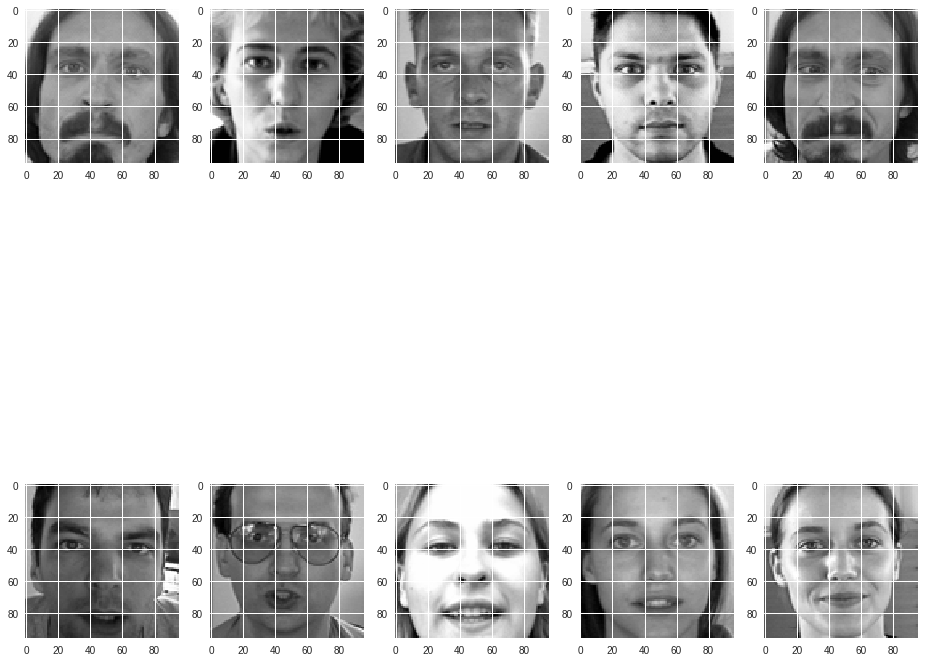

In [60]:
fig = plt.figure(figsize=(16, 16))
for i in range(10):
  
  fig.add_subplot(2, 5, i+1)
  plt.imshow(np_faces[i],cmap='gray')

plt.show()

YS - end of inset

Lets check for missing values

In [49]:
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

So there are missing values in 28 columns. We can do two things here one remove the rows having missing values and another is the fill missing values with something. I used two option as removing rows will reduce our dataset. 
I filled the missing values with the previous values in that row.

In [0]:

train_data.fillna(method = 'ffill',inplace = True)
#train_data.reset_index(drop = True,inplace = True)


Lets check for missing values now

In [51]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

In [56]:
#YS
train_data.shape

(7049, 31)

As there is no missing values we can now separate the labels and features.
The image is our feature and other values are labes that we have to predict later.
As image column values are in string format and there is also some missing values so we have to split the string by space and append it and also handling missing values

In [0]:

imag = []
for i in range(0,7049):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)
    
    

Lets reshape and convert it into float value.

In [0]:
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1,96,96)



Lets see what is the first image.

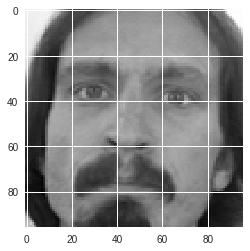

In [59]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

Now lets separate labels.

In [0]:
training = train_data.drop('Image',axis = 1)

y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]

    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')



In [62]:
#YS
y_train

array([[66.03356391, 39.00227368, 30.22700752, ..., 72.93545865,
        43.13070677, 84.48577444],
       [64.33293617, 34.9700766 , 29.9492766 , ..., 70.26655319,
        45.46791489, 85.48017021],
       [65.05705263, 34.90964211, 30.90378947, ..., 70.19178947,
        47.27494737, 78.65936842],
       ...,
       [66.69073171, 36.84522146, 31.66641951, ..., 75.96359236,
        49.46257171, 78.11712   ],
       [70.96508235, 39.85366588, 30.54328471, ..., 75.96359236,
        50.06518588, 79.58644706],
       [66.93831111, 43.42450963, 31.09605926, ..., 75.96359236,
        45.90048   , 82.7730963 ]])

As our data is ready for training , lets define our model. I am using keras and simple dense layers. For loss function I am using 'mse' ( mean squared error ) as we have to predict new values. Our result evaluted on the basics of 'mae' ( mean absolute error ) . 

In [63]:
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential

model = Sequential([Flatten(input_shape=(96,96)),
                         Dense(128, activation="relu"),
                         Dropout(0.1),
                         Dense(64, activation="relu"),
                         Dense(30)
                         ])

model.compile(optimizer='adam', 
              loss='mse',
              metrics=['mae','accuracy'])


Using TensorFlow backend.


Now our model is defined and we will train it by calling fit method. I ran it for 500 iteration keeping batch size and validtion set size as 20% ( 20% of the training data will be kept for validating the model ).

In [64]:
model.fit(X_train,y_train,epochs = 500,batch_size = 128,validation_split = 0.2)

Train on 5639 samples, validate on 1410 samples
Epoch 1/500
5639/5639 [==============================] - 3s 459us/step - loss: 19985.6429 - mean_absolute_error: 84.0507 - acc: 0.0403 - val_loss: 1436.8608 - val_mean_absolute_error: 33.0991 - val_acc: 0.0000e+00
Epoch 2/500
5639/5639 [==============================] - 2s 303us/step - loss: 1146.4023 - mean_absolute_error: 26.4313 - acc: 0.0025 - val_loss: 419.7820 - val_mean_absolute_error: 16.4190 - val_acc: 7.0922e-04
Epoch 3/500
5639/5639 [==============================] - 2s 309us/step - loss: 592.5486 - mean_absolute_error: 18.1156 - acc: 0.0374 - val_loss: 224.4862 - val_mean_absolute_error: 11.5765 - val_acc: 0.0943
Epoch 4/500
5639/5639 [==============================] - 2s 306us/step - loss: 416.3118 - mean_absolute_error: 15.0811 - acc: 0.1603 - val_loss: 201.7486 - val_mean_absolute_error: 11.2139 - val_acc: 0.2099
Epoch 5/500
5639/5639 [==============================] - 2s 303us/step - loss: 335.3066 - mean_absolute_error: 1

Now lets prepare our testing data

In [0]:
#preparing test data
timag = []
for i in range(0,1783):
    timg = test_data['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    
    timag.append(timg)

Reshaping and converting 

In [0]:
timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96)

Lets see first image in out test data

In [0]:
plt.imshow(X_test[0])
plt.show()

Lets predict our results

In [0]:
pred = model.predict(X_test)

Now the last step is the create our submission file keeping in the mind required format.
There should be two columns :- RowId and Location
Location column values should be filled according the lookup table provided ( IdLookupTable.csv)


In [0]:
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(pred)

In [0]:
rowid = lookid_data['RowId']
rowid=list(rowid)

In [0]:
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))

In [0]:
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])

In [0]:
rowid = pd.Series(rowid,name = 'RowId')

In [0]:
loc = pd.Series(preded,name = 'Location')

In [0]:
submission = pd.concat([rowid,loc],axis = 1)


In [0]:
submission.to_csv('face_key_detection_submission.csv',index = False)